# Import necessary Libraries  

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import skew, kurtosis
from IPython.display import HTML, display

# Load Dataset

In [2]:
df = pd.read_csv('AirQualityPrediction.csv')
df

,S.No,From Date,To Date,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),...,WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),TOT-RF (mm),AQI
0,1,01-Jul-2017 - 00:00,02-Jul-2017 - 00:00,34.45,58.86,3.33,16.91,11.45,5.12,34.78,...,1.76,292.28,77.73,735.23,0.08,26.23,0.08,2.53,7.5,69
1,2,02-Jul-2017 - 00:00,03-Jul-2017 - 00:00,40.48,110.71,3.01,15.35,10.61,3.81,13.97,...,1.92,281.92,80.81,736.38,0.09,26.34,0.02,2.08,2.0,107.14
2,3,03-Jul-2017 - 00:00,04-Jul-2017 - 00:00,42.87,105.22,3.39,19.65,13.20,4.40,31.77,...,1.81,284.73,76.28,737.94,0.08,27.59,0.01,3.03,1.0,103.48
3,4,04-Jul-2017 - 00:00,05-Jul-2017 - 00:00,46.26,123.44,3.19,16.26,11.23,4.98,31.88,...,1.84,275.53,146.96,736.99,0.09,30.54,0.00,2.90,0.0,115.626666666667
4,5,05-Jul-2017 - 00:00,06-Jul-2017 - 00:00,49.75,128.45,3.62,16.90,11.91,4.65,31.36,...,1.68,279.56,136.44,736.29,0.08,32.29,0.00,2.60,0.0,118.966666666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,28-Sep-2022 - 00:00,29-Sep-2022 - 00:00,27.76,89.86,29.07,29.81,39.54,21.92,11.89,...,0.82,242.94,144.63,744.35,0.05,31.37,0.00,1.24,0.0,89.86
1916,1917,29-Sep-2022 - 00:00,30-Sep-2022 - 00:00,31.52,117.02,28.49,30.00,39.16,21.70,13.60,...,0.65,182.23,127.07,743.94,0.06,30.69,0.00,1.09,0.0,111.346666666667
1917,1918,30-Sep-2022 - 00:00,01-Oct-2022 - 00:00,15.22,39.57,14.69,21.19,23.26,17.38,15.27,...,0.89,182.03,99.30,743.83,0.05,30.67,0.00,0.68,0.0,39.57
1918,1919,01-Oct-2022 - 00:00,02-Oct-2022 - 00:00,27.98,69.35,33.85,40.66,49.18,15.10,21.01,...,0.82,267.77,23.40,742.96,0.04,28.65,0.05,1.07,4.0,69.35


In [3]:
df.shape

(1920, 26)

# Data PreProcessing

# Drop samples which contains NULL values

In [4]:
df.isna().sum()

S.No                 0
From Date            0
To Date              0
PM2.5 (ug/m3)       66
PM10 (ug/m3)        68
NO (ug/m3)          56
NO2 (ug/m3)         85
NOx (ppb)           38
NH3 (ug/m3)         48
SO2 (ug/m3)         60
CO (mg/m3)          41
Ozone (ug/m3)       71
Benzene (ug/m3)     45
Toluene (ug/m3)     45
Temp (degree C)     67
RH (%)              47
WS (m/s)            47
WD (degree)         77
SR (W/mt2)          47
BP (mmHg)          138
VWS (m/s)           39
AT (degree C)       58
RF (mm)             37
Xylene (ug/m3)      45
TOT-RF (mm)          0
AQI                  0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.shape

(1675, 26)

# Check for non numeric values in AQI

In [9]:
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3637234654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')


In [10]:
non_numeric_rows = df[df['AQI'].isnull()]

In [11]:
print("No. of Rows with non-numeric values in 'AQI':\n", non_numeric_rows)

No. of Rows with non-numeric values in 'AQI':
 Empty DataFrame
Columns: [S.No, From Date, To Date, PM2.5 (ug/m3), PM10 (ug/m3), NO (ug/m3), NO2 (ug/m3), NOx (ppb), NH3 (ug/m3), SO2 (ug/m3), CO (mg/m3), Ozone (ug/m3), Benzene (ug/m3), Toluene (ug/m3), Temp (degree C), RH (%), WS (m/s), WD (degree), SR (W/mt2), BP (mmHg), VWS (m/s), AT (degree C), RF (mm), Xylene (ug/m3), TOT-RF (mm), AQI]
Index: []

[0 rows x 26 columns]


# Handling non numeric values in AQI and convert it into float

In [12]:
df['AQI'].fillna(df['AQI'].mean(), inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3479200298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI'].fillna(df['AQI'].mean(), inplace=True)


In [13]:
df['AQI'] = df['AQI'].astype(float)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\1862712222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI'] = df['AQI'].astype(float)


In [14]:
df['AQI'].dtype

dtype('float64')

# Statistical data

In [15]:
df.drop('S.No', axis=1, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\1072350437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('S.No', axis=1, inplace=True)


In [16]:
df.shape

(1675, 25)

In [17]:
df.describe()

,PM2.5 (ug/m3),PM10 (ug/m3),NO (ug/m3),NO2 (ug/m3),NOx (ppb),NH3 (ug/m3),SO2 (ug/m3),CO (mg/m3),Ozone (ug/m3),Benzene (ug/m3),...,WS (m/s),WD (degree),SR (W/mt2),BP (mmHg),VWS (m/s),AT (degree C),RF (mm),Xylene (ug/m3),TOT-RF (mm),AQI
count,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.00000,1675.000000,...,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000,1675.000000
mean,43.835487,106.940764,14.268854,35.258543,30.256860,13.435845,12.489260,0.665994,29.77449,3.364448,...,1.996675,209.305212,131.036854,745.738155,0.014107,27.836072,0.024842,2.852722,2.001791,108.513517
std,27.481329,51.512733,13.703685,15.882136,16.498585,11.392408,6.677693,0.335575,24.64034,1.933115,...,0.818755,51.106835,45.771101,9.253190,0.047405,3.372913,0.114524,5.310158,8.500621,56.374723
min,1.840000,8.270000,0.260000,0.560000,0.620000,0.030000,1.320000,0.000000,1.64000,0.000000,...,0.300000,15.000000,6.000000,701.000000,-0.130000,15.730000,0.000000,0.000000,0.000000,17.637500
25%,24.805000,71.525000,5.155000,24.635000,19.185000,7.710000,8.235000,0.450000,13.39500,2.000000,...,1.390000,176.855000,107.590000,742.400000,-0.010000,25.360000,0.000000,1.080000,0.000000,72.490000
50%,35.760000,99.950000,11.240000,33.620000,27.960000,11.560000,11.270000,0.660000,21.79000,3.170000,...,1.940000,210.950000,133.510000,746.670000,0.010000,28.240000,0.000000,1.880000,0.000000,100.253333
75%,56.960000,130.775000,18.690000,43.100000,37.730000,15.530000,15.245000,0.850000,36.95500,4.575000,...,2.530000,242.670000,159.155000,750.735000,0.050000,30.140000,0.000000,3.140000,0.000000,125.636667
max,202.520000,312.390000,136.790000,131.530000,129.900000,157.330000,78.710000,2.180000,163.36000,20.680000,...,5.900000,357.000000,520.410000,765.740000,0.160000,39.180000,2.520000,80.720000,132.000000,363.476923


# EDA - Correlation Matrix and Heatmap

In [18]:
corr_matrix = df.corr()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


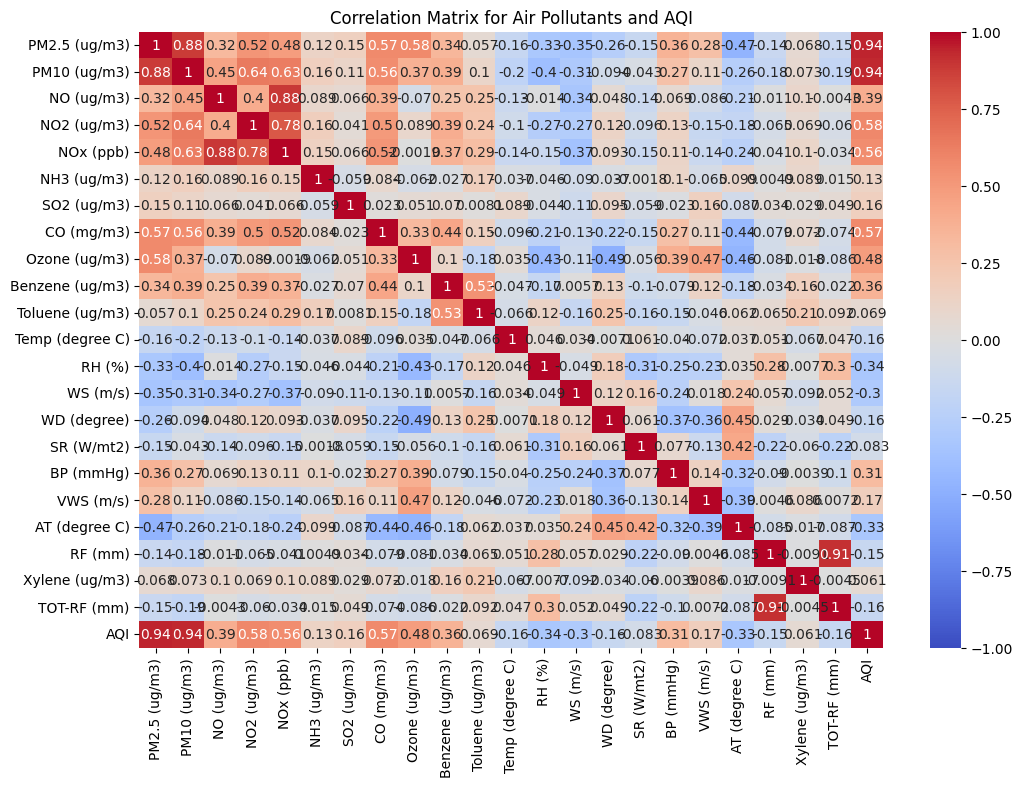

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Air Pollutants and AQI')
plt.show()

# Data transformation 

In [21]:
pollutants = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)', 'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)', 'Xylene (ug/m3)', 'TOT-RF (mm)', 'AQI']

In [22]:
before_transformation = pd.DataFrame(index=pollutants)

for pollutant in pollutants:
    before_transformation.loc[pollutant, 'Skewness'] = skew(df[pollutant])
    before_transformation.loc[pollutant, 'Kurtosis'] = kurtosis(df[pollutant])

print("Before Transformation:")
print(before_transformation)

Before Transformation:
                 Skewness   Kurtosis
PM2.5 (ug/m3)    1.434851   2.817812
PM10 (ug/m3)     1.056678   1.395349
NO (ug/m3)       3.434809  20.342671
NO2 (ug/m3)      0.901660   1.887593
NOx (ppb)        1.618107   4.986302
NH3 (ug/m3)      5.167540  44.734484
SO2 (ug/m3)      1.877827   8.664080
CO (mg/m3)       0.509864   1.048086
Ozone (ug/m3)    1.841919   3.865868
Benzene (ug/m3)  0.959096   4.132701
Toluene (ug/m3)  2.905587  15.262805
Xylene (ug/m3)   8.622456  91.683627
TOT-RF (mm)      7.846546  81.740087
AQI              1.603299   3.220021


In [23]:
trans_pollutants = ['NO (ug/m3)', 'NH3 (ug/m3)', 'Xylene (ug/m3)', 'TOT-RF (mm)']

for pollutant in trans_pollutants:
    df[pollutant] = np.sqrt(df[pollutant].clip(lower=0))  # Clip to avoid negative values

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3024970097.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[pollutant] = np.sqrt(df[pollutant].clip(lower=0))  # Clip to avoid negative values


In [29]:
after_transformation = pd.DataFrame(index=pollutants)

for pollutant in pollutants:
    after_transformation.loc[pollutant, 'Skewness'] = skew(df[pollutant])
    after_transformation.loc[pollutant, 'Kurtosis'] = kurtosis(df[pollutant])
    
print("After Transformation:")
print(after_transformation)

After Transformation:
                 Skewness   Kurtosis
PM2.5 (ug/m3)    1.434851   2.817812
PM10 (ug/m3)     1.056678   1.395349
NO (ug/m3)       1.020059   2.565662
NO2 (ug/m3)      0.901660   1.887593
NOx (ppb)        1.618107   4.986302
NH3 (ug/m3)      1.600320   7.684595
SO2 (ug/m3)      1.877827   8.664080
CO (mg/m3)       0.509864   1.048086
Ozone (ug/m3)    1.841919   3.865868
Benzene (ug/m3)  0.959096   4.132701
Toluene (ug/m3)  2.905587  15.262805
Xylene (ug/m3)   3.328516  20.885396
TOT-RF (mm)      3.603343  15.454250
AQI              1.603299   3.220021


In [30]:
table = pd.concat(
    [before_transformation.add_suffix('_before'), after_transformation.add_suffix('_after')],
    axis=1
)

display(table.style.set_caption("Skew & Kurtosis Values of Selected Features Before and After Transformation"))

,Skewness_before,Kurtosis_before,Skewness_after,Kurtosis_after
PM2.5 (ug/m3),1.434851,2.817812,1.434851,2.817812
PM10 (ug/m3),1.056678,1.395349,1.056678,1.395349
NO (ug/m3),3.434809,20.342671,1.020059,2.565662
NO2 (ug/m3),0.901660,1.887593,0.901660,1.887593
NOx (ppb),1.618107,4.986302,1.618107,4.986302
NH3 (ug/m3),5.167540,44.734484,1.600320,7.684595
SO2 (ug/m3),1.877827,8.664080,1.877827,8.664080
CO (mg/m3),0.509864,1.048086,0.509864,1.048086
Ozone (ug/m3),1.841919,3.865868,1.841919,3.865868
Benzene (ug/m3),0.959096,4.132701,0.959096,4.132701


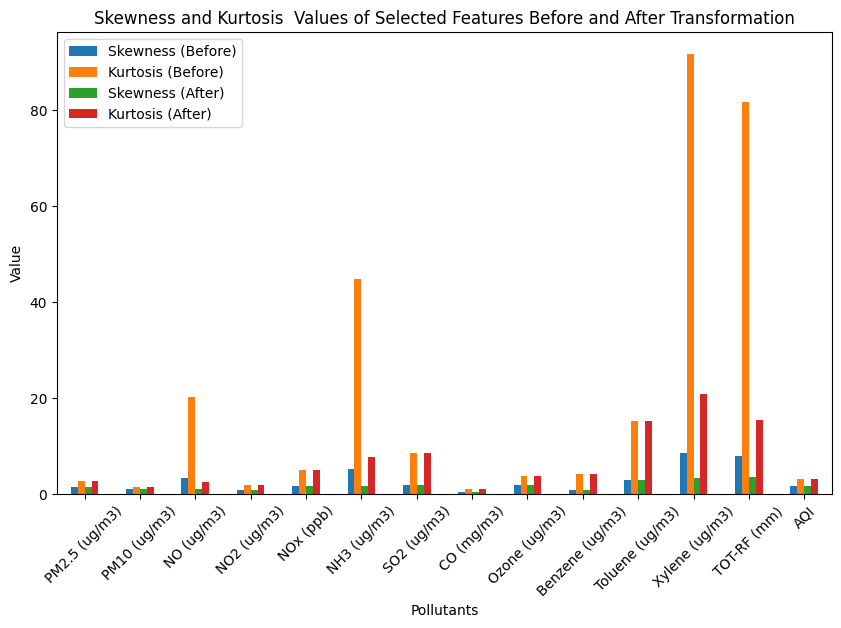

In [31]:
table.plot(kind='bar', figsize=(10, 6))
plt.title('Skewness and Kurtosis  Values of Selected Features Before and After Transformation')
plt.xlabel('Pollutants')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(['Skewness (Before)', 'Kurtosis (Before)', 'Skewness (After)', 'Kurtosis (After)'])
plt.show()

# AQI data summary

In [32]:
df.columns

Index(['From Date', 'To Date', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO (ug/m3)',
       'NO2 (ug/m3)', 'NOx (ppb)', 'NH3 (ug/m3)', 'SO2 (ug/m3)', 'CO (mg/m3)',
       'Ozone (ug/m3)', 'Benzene (ug/m3)', 'Toluene (ug/m3)',
       'Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (degree)', 'SR (W/mt2)',
       'BP (mmHg)', 'VWS (m/s)', 'AT (degree C)', 'RF (mm)', 'Xylene (ug/m3)',
       'TOT-RF (mm)', 'AQI'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3887979595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%b-%Y - %H:%M')
C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3887979595.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['From Date'].dt.year
C:\Users\DELL\AppData\Local\Temp\ipykernel_3532\3887979595.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

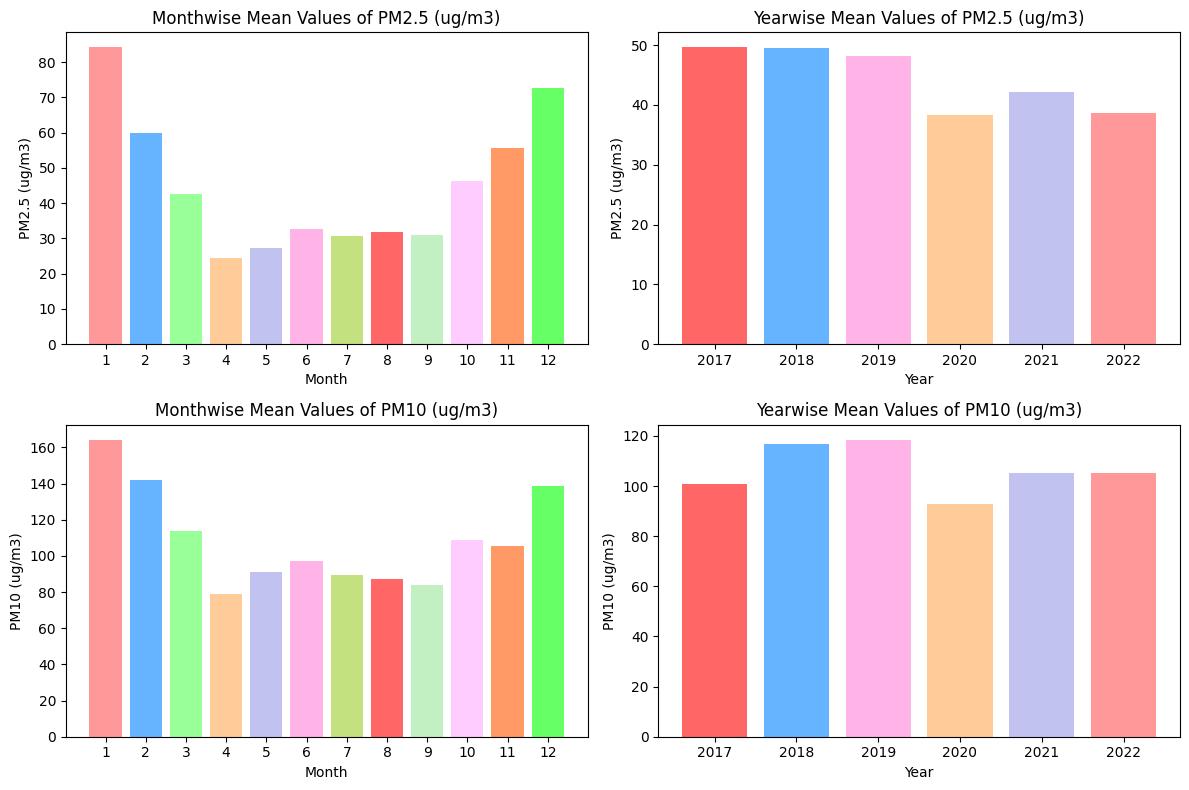

In [33]:
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%b-%Y - %H:%M')

df['Year'] = df['From Date'].dt.year
df['Month'] = df['From Date'].dt.month

monthly_avg = df.groupby(df['From Date'].dt.month)[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']].mean()
annual_avg = df.groupby(df['From Date'].dt.year)[['PM2.5 (ug/m3)', 'PM10 (ug/m3)']].mean()

colors_monthly = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#ff6666', '#c2f0c2', '#ffccff', '#ff9966', '#66ff66']
colors_annual = ['#ff6666', '#66b3ff', '#ffb3e6', '#ffcc99', '#c2c2f0', '#ff9999']

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(monthly_avg.index, monthly_avg['PM2.5 (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of PM2.5 (ug/m3)')
plt.xlabel('Month')
plt.ylabel('PM2.5 (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(2, 2, 2)
plt.bar(annual_avg.index, annual_avg['PM2.5 (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of PM2.5 (ug/m3)')
plt.xlabel('Year')
plt.ylabel('PM2.5 (ug/m3)')
plt.xticks(annual_avg.index)

plt.subplot(2, 2, 3)
plt.bar(monthly_avg.index, monthly_avg['PM10 (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of PM10 (ug/m3)')
plt.xlabel('Month')
plt.ylabel('PM10 (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(2, 2, 4)
plt.bar(annual_avg.index, annual_avg['PM10 (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of PM10 (ug/m3)')
plt.xlabel('Year')
plt.ylabel('PM10 (ug/m3)')
plt.xticks(annual_avg.index)

plt.tight_layout()
plt.show()

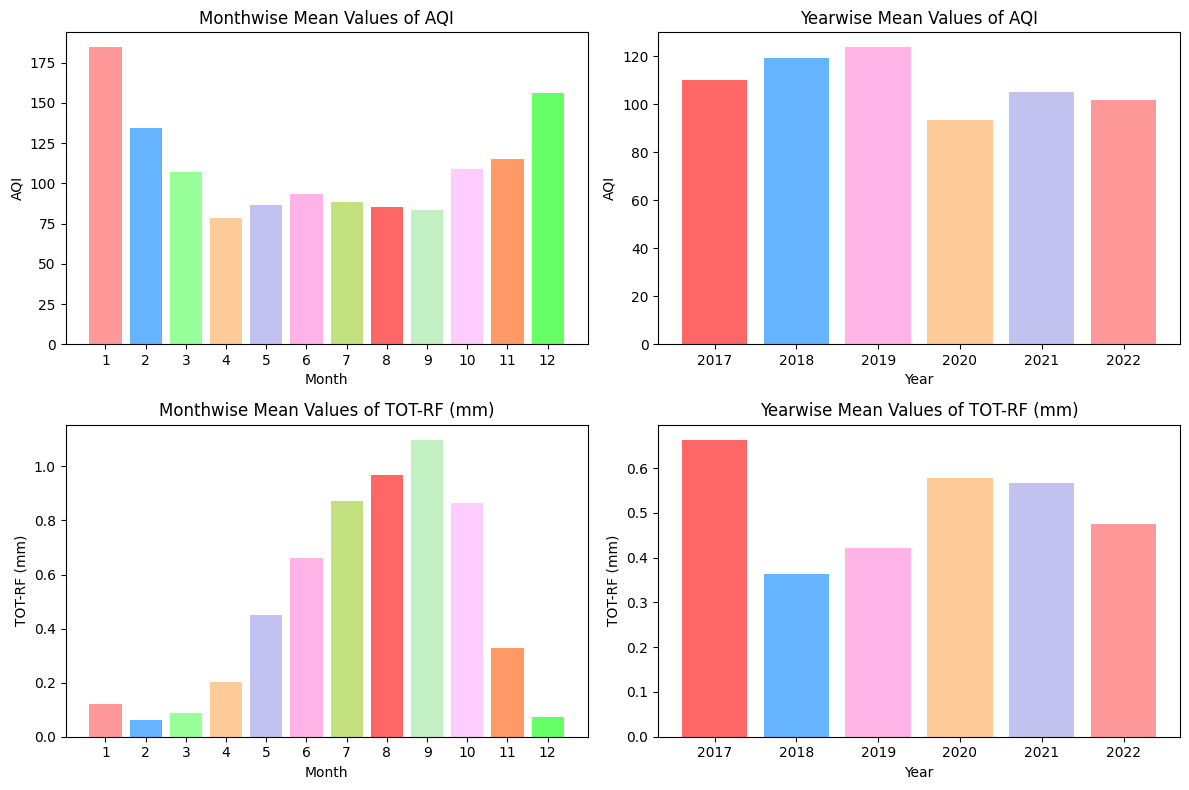

In [34]:
monthly_avg1 = df.groupby(df['From Date'].dt.month)[['AQI', 'TOT-RF (mm)']].mean()
annual_avg1 = df.groupby(df['From Date'].dt.year)[['AQI', 'TOT-RF (mm)']].mean()

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(monthly_avg1.index, monthly_avg1['AQI'], color=colors_monthly)
plt.title('Monthwise Mean Values of AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(2, 2, 2)
plt.bar(annual_avg1.index, annual_avg1['AQI'], color=colors_annual)
plt.title('Yearwise Mean Values of AQI')
plt.xlabel('Year')
plt.ylabel('AQI')
plt.xticks(annual_avg1.index)

plt.subplot(2, 2, 3)
plt.bar(monthly_avg1.index, monthly_avg1['TOT-RF (mm)'], color=colors_monthly)
plt.title('Monthwise Mean Values of TOT-RF (mm)')
plt.xlabel('Month')
plt.ylabel('TOT-RF (mm)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(2, 2, 4)
plt.bar(annual_avg1.index, annual_avg1['TOT-RF (mm)'], color=colors_annual)
plt.title('Yearwise Mean Values of TOT-RF (mm)')
plt.xlabel('Year')
plt.ylabel('TOT-RF (mm)')
plt.xticks(annual_avg1.index)

plt.tight_layout()
plt.show()

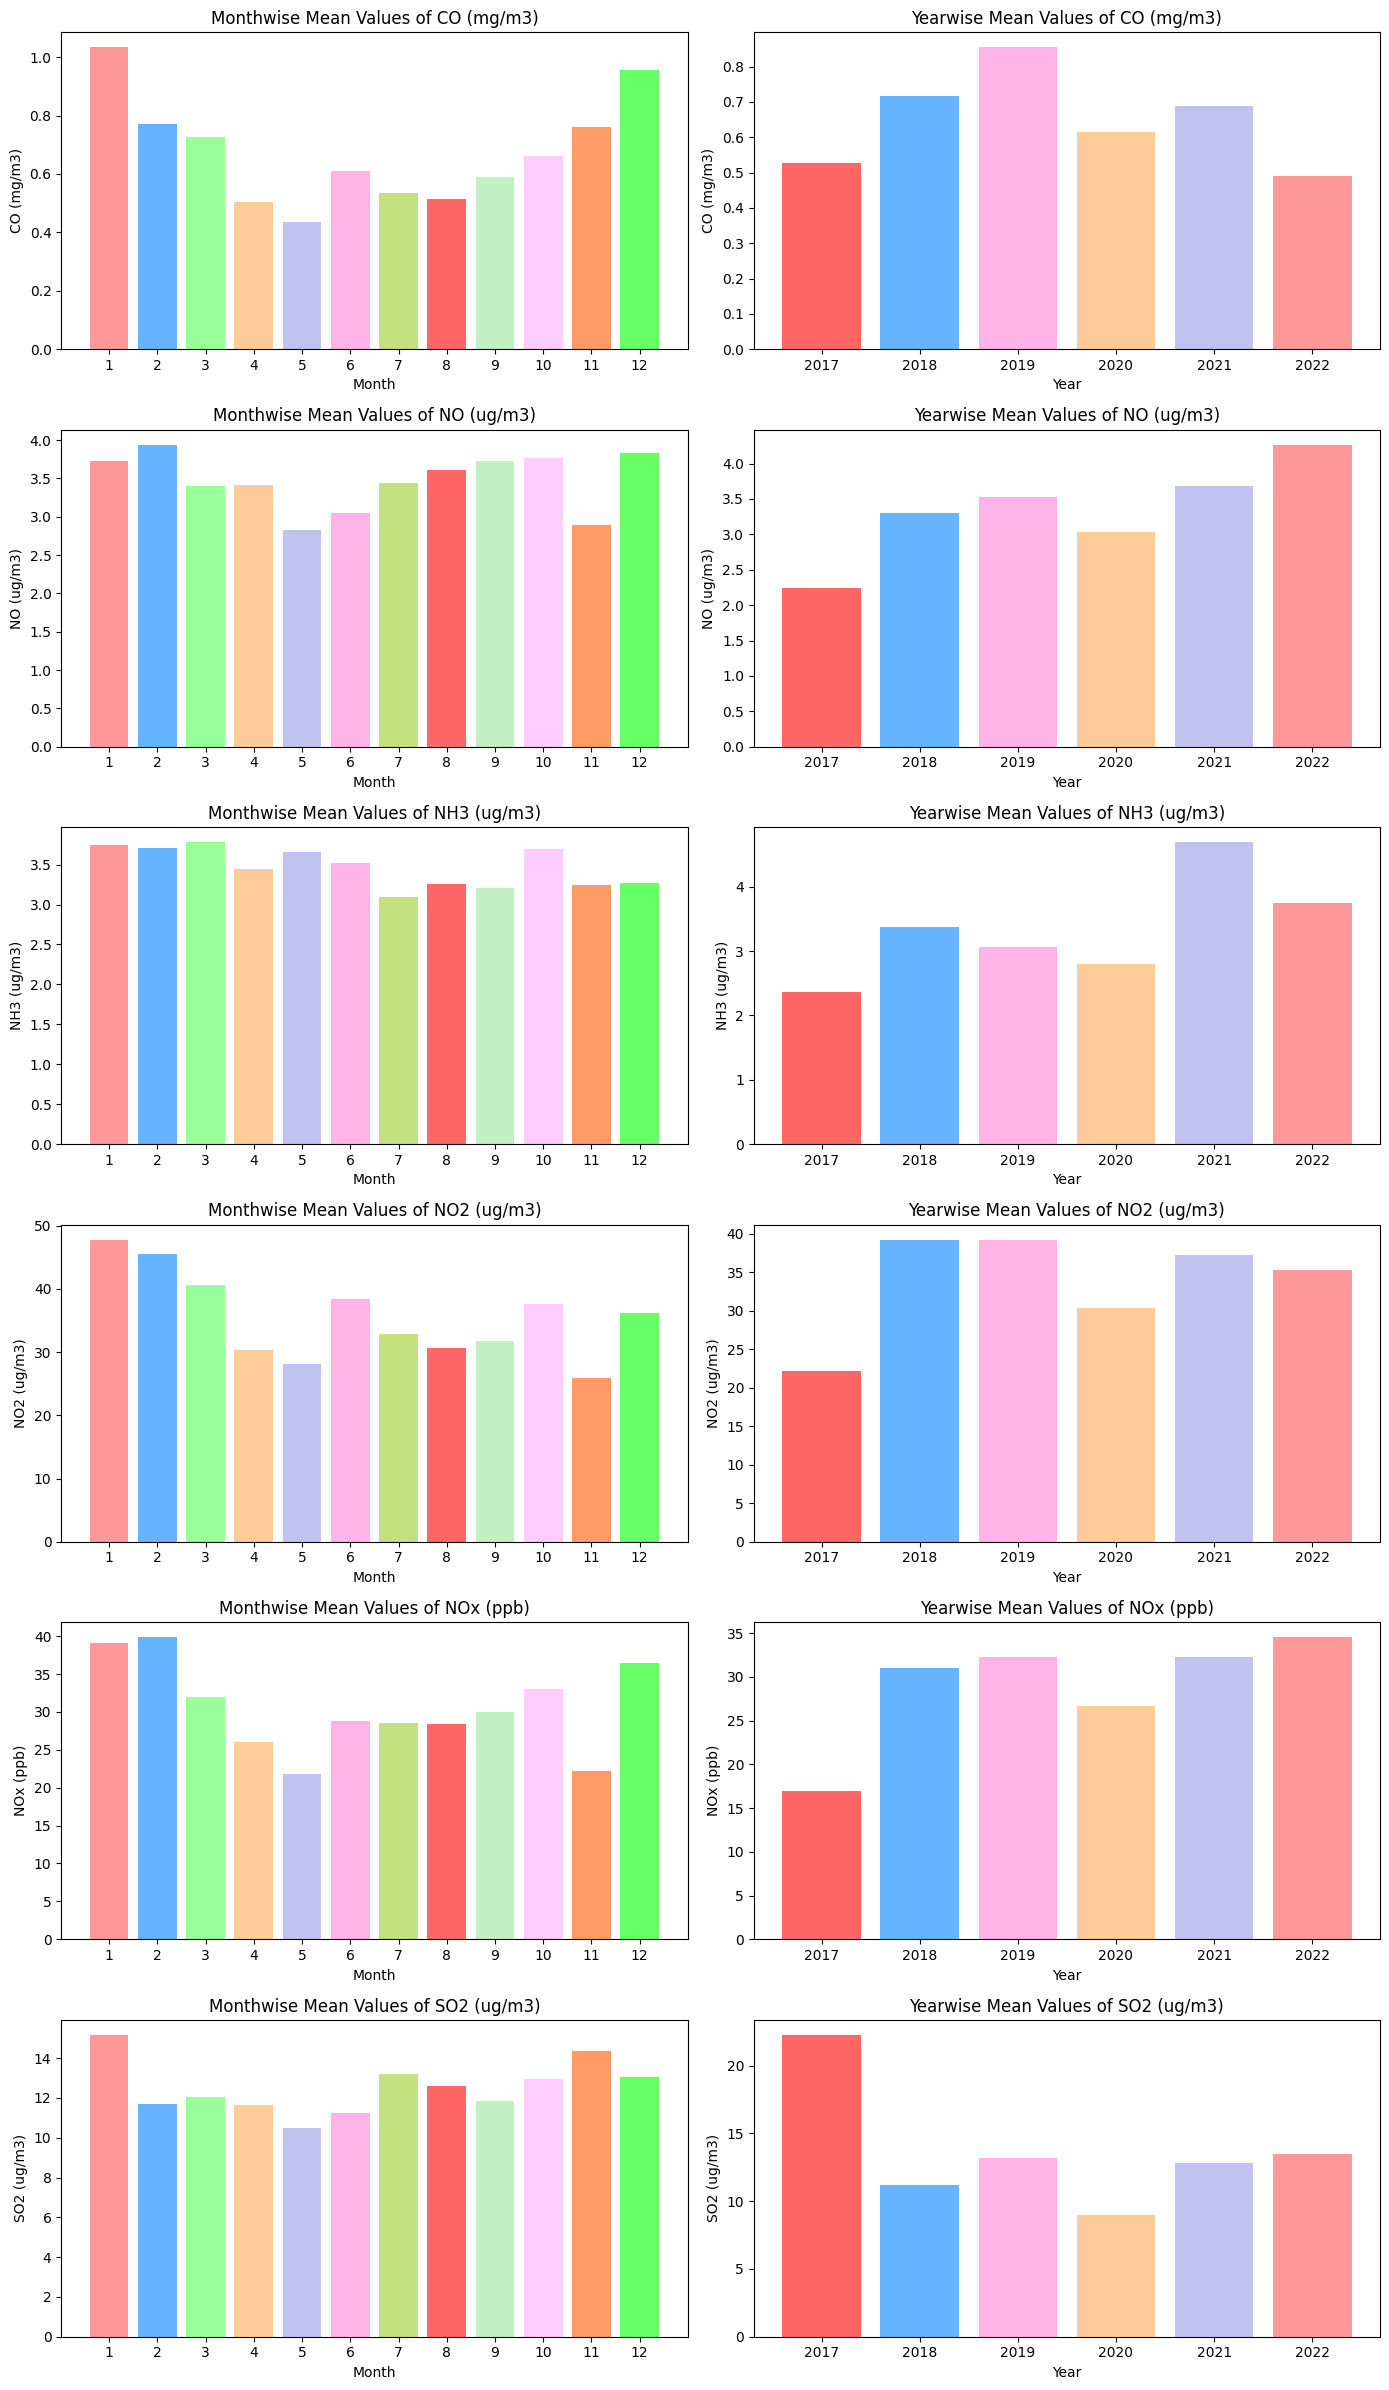

In [35]:
monthly_avg2 = df.groupby(df['From Date'].dt.month)[['CO (mg/m3)', 'NO (ug/m3)', 'NH3 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'SO2 (ug/m3)']].mean()
annual_avg2 = df.groupby(df['From Date'].dt.year)[['CO (mg/m3)', 'NO (ug/m3)', 'NH3 (ug/m3)', 'NO2 (ug/m3)', 'NOx (ppb)', 'SO2 (ug/m3)']].mean()

plt.figure(figsize=(14, 24))

plt.subplot(6, 2, 1)
plt.bar(monthly_avg2.index, monthly_avg2['CO (mg/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of CO (mg/m3)')
plt.xlabel('Month')
plt.ylabel('CO (mg/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(6, 2, 2)
plt.bar(annual_avg2.index, annual_avg2['CO (mg/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of CO (mg/m3)')
plt.xlabel('Year')
plt.ylabel('CO (mg/m3)')
plt.xticks(annual_avg2.index)

plt.subplot(6, 2, 3)
plt.bar(monthly_avg2.index, monthly_avg2['NO (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of NO (ug/m3)')
plt.xlabel('Month')
plt.ylabel('NO (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(6, 2, 4)
plt.bar(annual_avg2.index, annual_avg2['NO (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of NO (ug/m3)')
plt.xlabel('Year')
plt.ylabel('NO (ug/m3)')
plt.xticks(annual_avg2.index)

plt.subplot(6, 2, 5)
plt.bar(monthly_avg2.index, monthly_avg2['NH3 (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of NH3 (ug/m3)')
plt.xlabel('Month')
plt.ylabel('NH3 (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(6, 2, 6)
plt.bar(annual_avg2.index, annual_avg2['NH3 (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of NH3 (ug/m3)')
plt.xlabel('Year')
plt.ylabel('NH3 (ug/m3)')
plt.xticks(annual_avg2.index)

plt.subplot(6, 2, 7)
plt.bar(monthly_avg2.index, monthly_avg2['NO2 (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of NO2 (ug/m3)')
plt.xlabel('Month')
plt.ylabel('NO2 (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(6, 2, 8)
plt.bar(annual_avg2.index, annual_avg2['NO2 (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of NO2 (ug/m3)')
plt.xlabel('Year')
plt.ylabel('NO2 (ug/m3)')
plt.xticks(annual_avg2.index)

plt.subplot(6, 2, 9)
plt.bar(monthly_avg2.index, monthly_avg2['NOx (ppb)'], color=colors_monthly)
plt.title('Monthwise Mean Values of NOx (ppb)')
plt.xlabel('Month')
plt.ylabel('NOx (ppb)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(6, 2, 10)
plt.bar(annual_avg2.index, annual_avg2['NOx (ppb)'], color=colors_annual)
plt.title('Yearwise Mean Values of NOx (ppb)')
plt.xlabel('Year')
plt.ylabel('NOx (ppb)')
plt.xticks(annual_avg2.index)

plt.subplot(6, 2, 11)
plt.bar(monthly_avg2.index, monthly_avg2['SO2 (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of SO2 (ug/m3)')
plt.xlabel('Month')
plt.ylabel('SO2 (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(6, 2, 12)
plt.bar(annual_avg2.index, annual_avg2['SO2 (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of SO2 (ug/m3)')
plt.xlabel('Year')
plt.ylabel('SO2 (ug/m3)')
plt.xticks(annual_avg2.index)

plt.tight_layout()
plt.show()

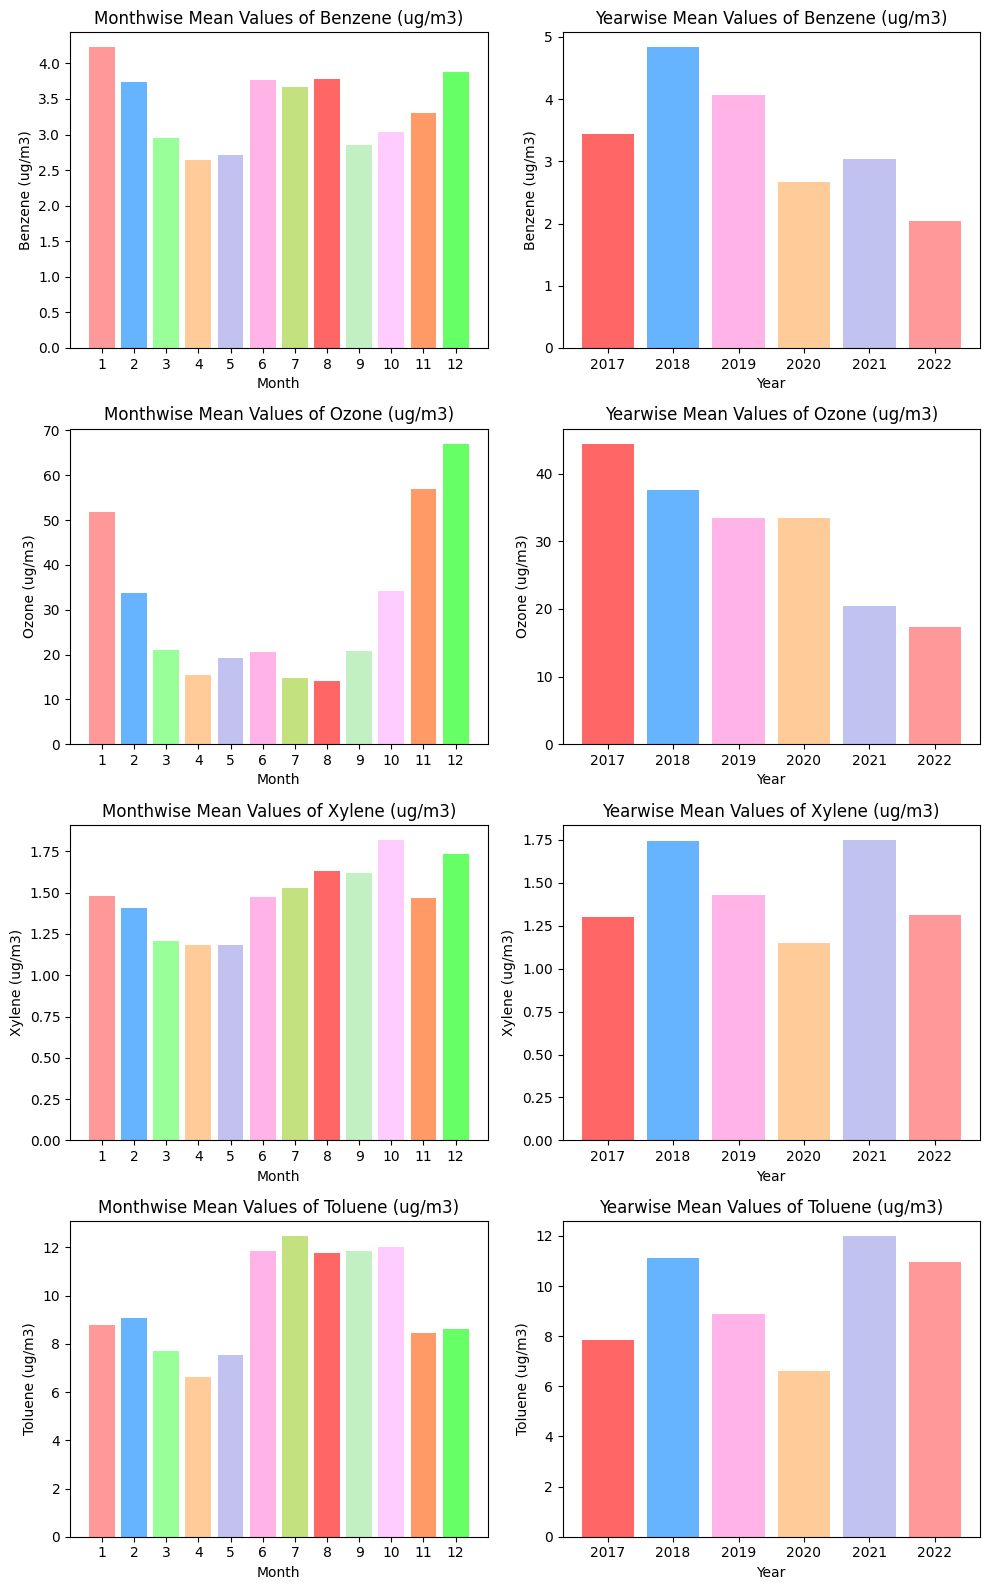

In [36]:
monthly_avg3 = df.groupby(df['From Date'].dt.month)[['Benzene (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)', 'Toluene (ug/m3)']].mean()
annual_avg3 = df.groupby(df['From Date'].dt.year)[['Benzene (ug/m3)', 'Ozone (ug/m3)', 'Xylene (ug/m3)', 'Toluene (ug/m3)']].mean()

plt.figure(figsize=(10, 16))

plt.subplot(4, 2, 1)
plt.bar(monthly_avg3.index, monthly_avg3['Benzene (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of Benzene (ug/m3)')
plt.xlabel('Month')
plt.ylabel('Benzene (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(4, 2, 2)
plt.bar(annual_avg3.index, annual_avg3['Benzene (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of Benzene (ug/m3)')
plt.xlabel('Year')
plt.ylabel('Benzene (ug/m3)')
plt.xticks(annual_avg3.index)

plt.subplot(4, 2, 3)
plt.bar(monthly_avg3.index, monthly_avg3['Ozone (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of Ozone (ug/m3)')
plt.xlabel('Month')
plt.ylabel('Ozone (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(4, 2, 4)
plt.bar(annual_avg3.index, annual_avg3['Ozone (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of Ozone (ug/m3)')
plt.xlabel('Year')
plt.ylabel('Ozone (ug/m3)')
plt.xticks(annual_avg3.index)

plt.subplot(4, 2, 5)
plt.bar(monthly_avg3.index, monthly_avg3['Xylene (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of Xylene (ug/m3)')
plt.xlabel('Month')
plt.ylabel('Xylene (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(4, 2, 6)
plt.bar(annual_avg3.index, annual_avg3['Xylene (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of Xylene (ug/m3)')
plt.xlabel('Year')
plt.ylabel('Xylene (ug/m3)')
plt.xticks(annual_avg3.index)

plt.subplot(4, 2, 7)
plt.bar(monthly_avg3.index, monthly_avg3['Toluene (ug/m3)'], color=colors_monthly)
plt.title('Monthwise Mean Values of Toluene (ug/m3)')
plt.xlabel('Month')
plt.ylabel('Toluene (ug/m3)')
plt.xticks(np.arange(1, 13, 1))

plt.subplot(4, 2, 8)
plt.bar(annual_avg3.index, annual_avg3['Toluene (ug/m3)'], color=colors_annual)
plt.title('Yearwise Mean Values of Toluene (ug/m3)')
plt.xlabel('Year')
plt.ylabel('Toluene (ug/m3)')
plt.xticks(annual_avg3.index)

plt.tight_layout()
plt.show()

# Machine Learning Models to predict AQI 

In [37]:
features = ['PM2.5 (ug/m3)', 'PM10 (ug/m3)', 'NO2 (ug/m3)', 'CO (mg/m3)', 'NOx (ppb)', 'BP (mmHg)']
target = 'AQI'

In [38]:
data = df[features + [target]].dropna()

In [39]:
data.sample(5)

,PM2.5 (ug/m3),PM10 (ug/m3),NO2 (ug/m3),CO (mg/m3),NOx (ppb),BP (mmHg),AQI
1138,23.79,50.94,23.85,0.36,16.50,741.15,50.94
1569,45.35,95.69,36.63,0.83,28.21,744.36,95.69
563,65.00,266.89,60.86,1.17,46.44,760.50,216.89
1339,35.55,101.98,46.73,0.62,42.78,750.40,101.32
1474,21.88,70.25,37.36,0.83,33.15,742.72,70.25


In [40]:
X = data[features]
y = data[target]

In [41]:
print(X.shape)
print(y.shape)

(1675, 6)
(1675,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1340, 6)
(335, 6)
(1340,)
(335,)


# LightGBM Model

In [44]:
X.columns = [col.replace(' ', '_') for col in X.columns]

In [45]:
lgbm = LGBMRegressor(verbose=-1)

In [46]:
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}

In [47]:
grid_search = GridSearchCV(lgbm, param_grid, cv=3, scoring='neg_mean_squared_error')

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(verbose=-1),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [49]:
best_lgbm = grid_search.best_estimator_

In [50]:
y_train_pred = best_lgbm.predict(X_train)

In [51]:
print("LightGBM training Results:")
print("MAE:", mean_absolute_error(y_train, y_train_pred))
print("MSE:", mean_squared_error(y_train, y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 Score:", r2_score(y_train, y_train_pred))

LightGBM training Results:
MAE: 1.373889445714209
MSE: 15.846370145389054
RMSE: 3.9807499476089996
R2 Score: 0.9952206371458551


In [52]:
y_pred = best_lgbm.predict(X_test)

In [53]:
print("LightGBM Results:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

LightGBM Results:
MAE: 1.811601600461544
MSE: 19.47823498480622
RMSE: 4.4134153424311
R2 Score: 0.9925355534577462


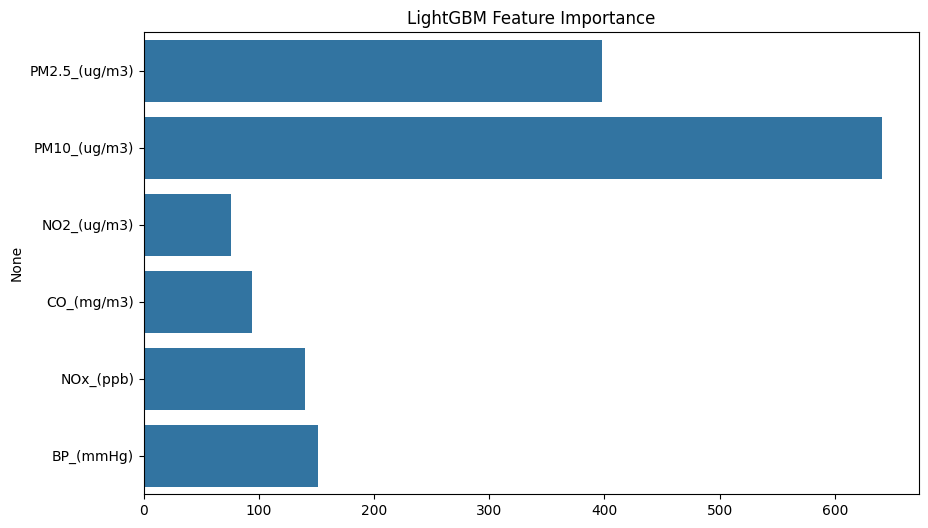

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_lgbm.feature_importances_, y=X.columns)
plt.title('LightGBM Feature Importance')
plt.show()

# Random Forest Model

In [56]:
rf = RandomForestRegressor()

In [57]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

In [58]:
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=3, scoring='neg_mean_squared_error')

In [59]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [63]:
best_rf = grid_search_rf.best_estimator_

In [64]:
y_train_pred_rf = best_rf.predict(X_train)

In [65]:
print("Random Forest training Results:")
print("MAE:", mean_absolute_error(y_train, y_train_pred_rf))
print("MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_rf)))
print("R2 Score:", r2_score(y_train, y_train_pred_rf))

Random Forest training Results:
MAE: 0.46275310450012025
MSE: 3.928433993870491
RMSE: 1.9820277480071995
R2 Score: 0.9988151601071411


In [66]:
y_pred_rf = best_rf.predict(X_test)

In [67]:
print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Results:
MAE: 1.2738744661308972
MSE: 20.724630156539085
RMSE: 4.552431235783698
R2 Score: 0.9920579100707977


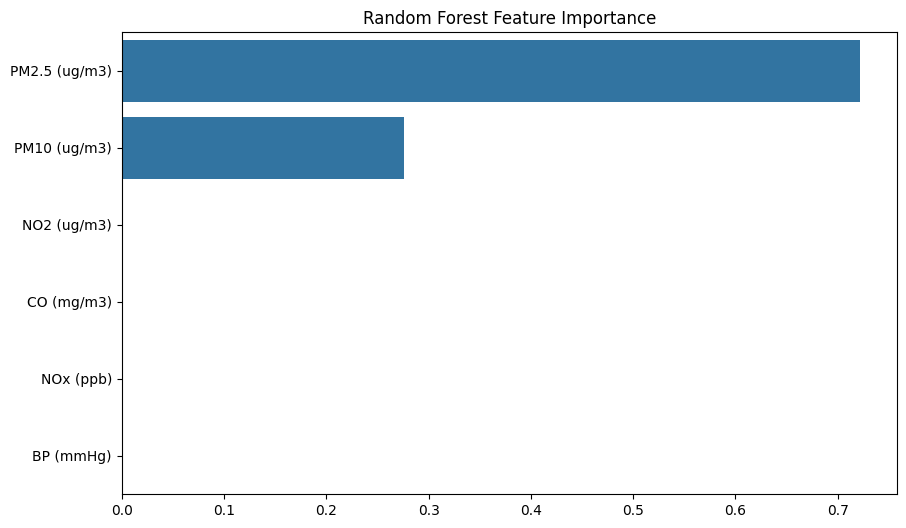

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=features)
plt.title('Random Forest Feature Importance')
plt.show()

# CatBoost Model 

In [69]:
catboost = CatBoostRegressor(silent=True)

In [70]:
param_grid_cb = {'iterations': [100, 200], 'learning_rate': [0.01, 0.1, 0.5]}

In [71]:
grid_search_cb = GridSearchCV(catboost, param_grid_cb, cv=3, scoring='neg_mean_squared_error')

In [72]:
grid_search_cb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000198B690C730>,
             param_grid={'iterations': [100, 200],
                         'learning_rate': [0.01, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [73]:
best_catboost = grid_search.best_estimator_

In [74]:
y_train_pred_cb = best_catboost.predict(X_train)

In [75]:
print("CatBoost training Results:")
print("MAE:", mean_absolute_error(y_train, y_train_pred_cb))
print("MSE:", mean_squared_error(y_train, y_train_pred_cb))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_cb)))
print("R2 Score:", r2_score(y_train, y_train_pred_cb))

CatBoost training Results:
MAE: 1.373889445714209
MSE: 15.846370145389054
RMSE: 3.9807499476089996
R2 Score: 0.9952206371458551


In [76]:
y_pred_cb = best_catboost.predict(X_test)

In [77]:
print("CatBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_cb))
print("MSE:", mean_squared_error(y_test, y_pred_cb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cb)))
print("R2 Score:", r2_score(y_test, y_pred_cb))

CatBoost Results:
MAE: 1.811601600461544
MSE: 19.47823498480622
RMSE: 4.4134153424311
R2 Score: 0.9925355534577462


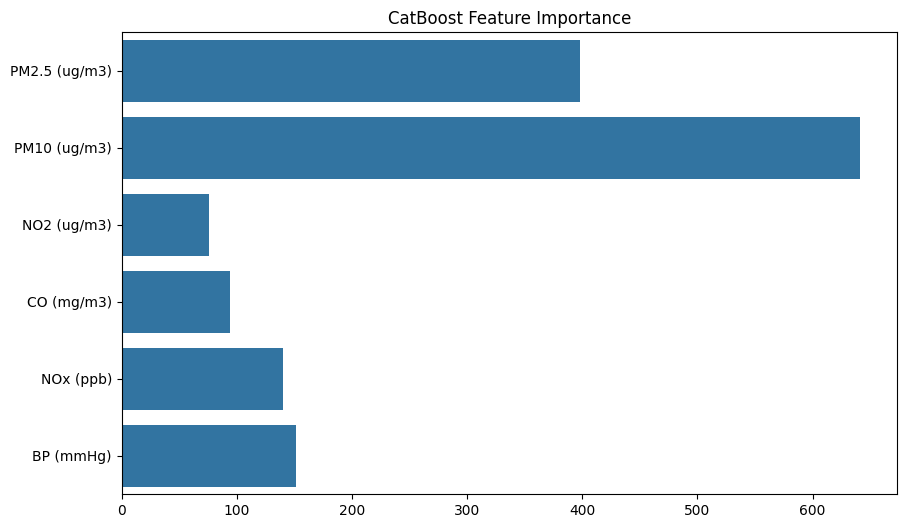

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_catboost.feature_importances_, y=features)
plt.title('CatBoost Feature Importance')
plt.show()

# AdaBoost Model

In [79]:
adaboost = AdaBoostRegressor()

In [80]:
param_grid_ab = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}

In [81]:
grid_search_ab = GridSearchCV(adaboost, param_grid_ab, cv=3, scoring='neg_mean_squared_error')

In [82]:
grid_search_ab.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [83]:
best_adaboost = grid_search.best_estimator_

In [84]:
y_train_pred_ab = best_adaboost.predict(X_train)

In [85]:
print("AdaBoost training Results:")
print("MAE:", mean_absolute_error(y_train, y_train_pred_ab))
print("MSE:", mean_squared_error(y_train, y_train_pred_ab))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_ab)))
print("R2 Score:", r2_score(y_train, y_train_pred_ab))

AdaBoost training Results:
MAE: 1.373889445714209
MSE: 15.846370145389054
RMSE: 3.9807499476089996
R2 Score: 0.9952206371458551


In [86]:
y_pred_ab = best_adaboost.predict(X_test)

In [87]:
print("AdaBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_ab))
print("MSE:", mean_squared_error(y_test, y_pred_ab))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ab)))
print("R2 Score:", r2_score(y_test, y_pred_ab))

AdaBoost Results:
MAE: 1.811601600461544
MSE: 19.47823498480622
RMSE: 4.4134153424311
R2 Score: 0.9925355534577462


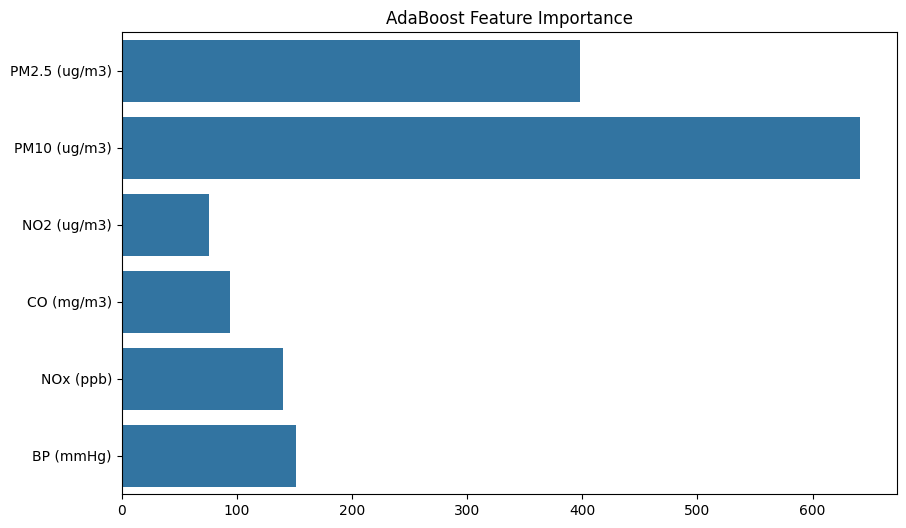

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_adaboost.feature_importances_, y=features)
plt.title('AdaBoost Feature Importance')
plt.show()

# XGBoost Model

In [89]:
xgboost = XGBRegressor()

In [90]:
param_grid_xb = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]}

In [91]:
grid_search_xb = GridSearchCV(xgboost, param_grid_xb, cv=3, scoring='neg_mean_squared_error')

In [92]:
grid_search_xb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [93]:
best_xgboost = grid_search_xb.best_estimator_

In [94]:
y_train_pred_xb = best_xgboost.predict(X_train)

In [95]:
print("XgBoost training Results:")
print("MAE:", mean_absolute_error(y_train, y_train_pred_xb))
print("MSE:", mean_squared_error(y_train, y_train_pred_xb))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_xb)))
print("R2 Score:", r2_score(y_train, y_train_pred_xb))

XgBoost training Results:
MAE: 0.4393698202791669
MSE: 0.6358316533567578
RMSE: 0.797390527506289
R2 Score: 0.9998082292564379


In [96]:
y_pred_xb = best_xgboost.predict(X_test)

In [97]:
print("XGBoost Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_xb))
print("MSE:", mean_squared_error(y_test, y_pred_xb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xb)))
print("R2 Score:", r2_score(y_test, y_pred_xb))

XGBoost Results:
MAE: 1.6234635560083095
MSE: 19.362134606475053
RMSE: 4.400242562231661
R2 Score: 0.9925800454288239


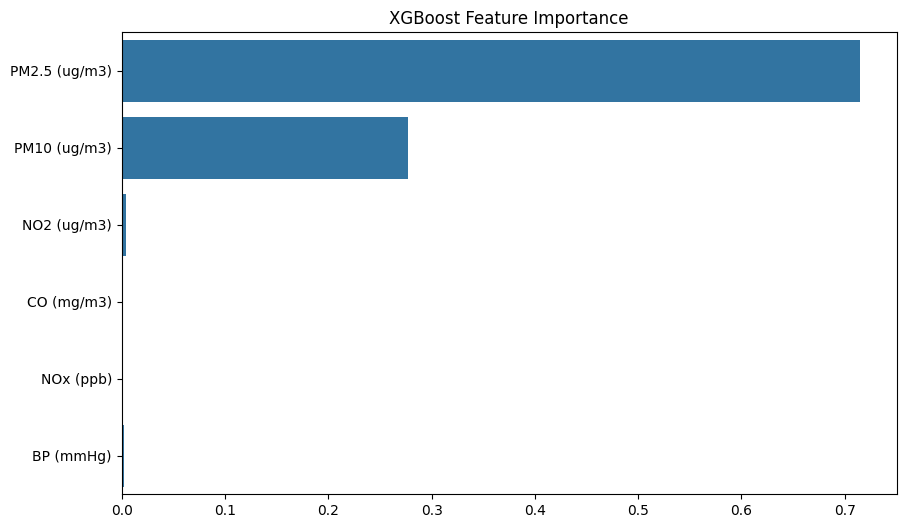

In [98]:
plt.figure(figsize=(10, 6))
sns.barplot(x=best_xgboost.feature_importances_, y=features)
plt.title('XGBoost Feature Importance')
plt.show()

# Comparison

In [99]:
def evaluate_model(y_true, y_pred, model_name):
    return {
        'Model': model_name,
        'MAE': mean_absolute_error(y_true, y_pred),
        'MSE': mean_squared_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2': r2_score(y_true, y_pred)
    }

In [100]:
results_train = [
    evaluate_model(y_train, y_train_pred, 'LightGBM'),
    evaluate_model(y_train, y_train_pred_rf, 'RandomForest'),
    evaluate_model(y_train, y_train_pred_cb, 'CatBoost'),
    evaluate_model(y_train, y_train_pred_ab, 'AdaBoost'),
    evaluate_model(y_train, y_train_pred_xb, 'XGBoost')
]

In [101]:
results_train_df = pd.DataFrame(results_train)

In [102]:
print("\nModel Training Comparison Table:")
print(results_train_df)


Model Training Comparison Table:
          Model       MAE        MSE      RMSE        R2
0      LightGBM  1.373889  15.846370  3.980750  0.995221
1  RandomForest  0.462753   3.928434  1.982028  0.998815
2      CatBoost  1.373889  15.846370  3.980750  0.995221
3      AdaBoost  1.373889  15.846370  3.980750  0.995221
4       XGBoost  0.439370   0.635832  0.797391  0.999808


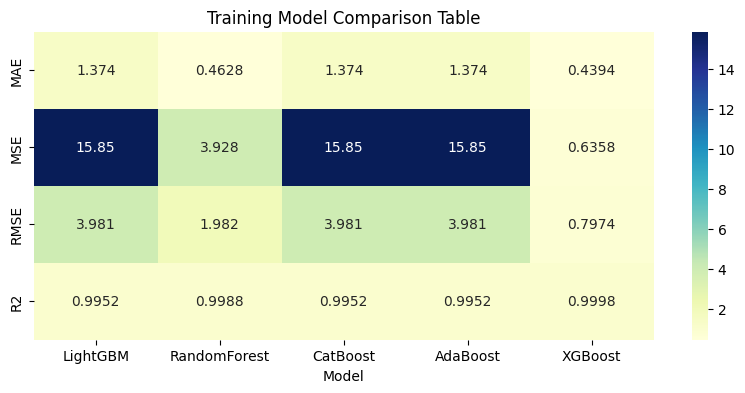

In [103]:
plt.figure(figsize=(10, 4))
sns.heatmap(results_train_df.set_index('Model').T, annot=True, cmap="YlGnBu", fmt=".4g")
plt.title('Training Model Comparison Table')
plt.show()

In [104]:
results = [
    evaluate_model(y_test, y_pred, 'LightGBM'),
    evaluate_model(y_test, y_pred_rf, 'RandomForest'),
    evaluate_model(y_test, y_pred_cb, 'CatBoost'),
    evaluate_model(y_test, y_pred_ab, 'AdaBoost'),
    evaluate_model(y_test, y_pred_xb, 'XGBoost')
]

In [105]:
results_df = pd.DataFrame(results)

In [106]:
print("\nModel Comparison Table:")
print(results_df)


Model Comparison Table:
          Model       MAE        MSE      RMSE        R2
0      LightGBM  1.811602  19.478235  4.413415  0.992536
1  RandomForest  1.273874  20.724630  4.552431  0.992058
2      CatBoost  1.811602  19.478235  4.413415  0.992536
3      AdaBoost  1.811602  19.478235  4.413415  0.992536
4       XGBoost  1.623464  19.362135  4.400243  0.992580


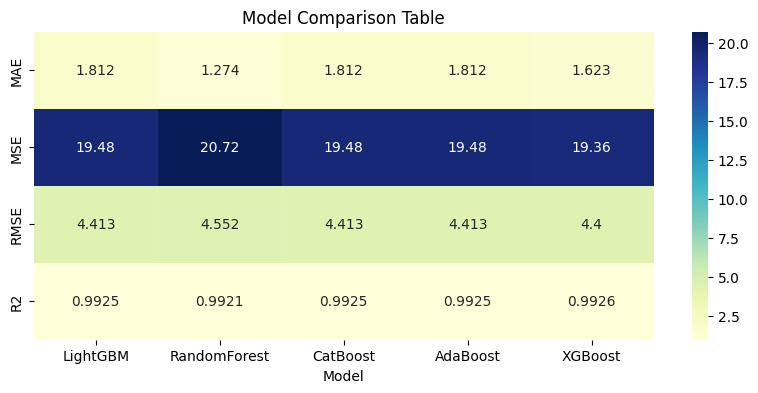

In [107]:
plt.figure(figsize=(10, 4))
sns.heatmap(results_df.set_index('Model').T, annot=True, cmap="YlGnBu", fmt=".4g")
plt.title('Model Comparison Table')
plt.show()

In [108]:
results_df = results_df.drop(columns=['Model'])

In [110]:
comparison_table = pd.concat(
    [results_train_df.add_suffix('_Training'), results_df.add_suffix('_Testing')],
    axis=1
)

display(comparison_table.style.set_caption("Machine learning Models with their performance factors in prediction of AQI"))

,Model_Training,MAE_Training,MSE_Training,RMSE_Training,R2_Training,MAE_Testing,MSE_Testing,RMSE_Testing,R2_Testing
0,LightGBM,1.373889,15.846370,3.980750,0.995221,1.811602,19.478235,4.413415,0.992536
1,RandomForest,0.462753,3.928434,1.982028,0.998815,1.273874,20.724630,4.552431,0.992058
2,CatBoost,1.373889,15.846370,3.980750,0.995221,1.811602,19.478235,4.413415,0.992536
3,AdaBoost,1.373889,15.846370,3.980750,0.995221,1.811602,19.478235,4.413415,0.992536
4,XGBoost,0.439370,0.635832,0.797391,0.999808,1.623464,19.362135,4.400243,0.992580


# AQI Prediction

In [119]:
def get_aqi_color_and_impact(aqi_value):
    if 0 <= aqi_value <= 50:
        return "Good", "#00E400", "Minimal impact" #Green
    elif 51 <= aqi_value <= 100:
        return "Satisfactory", "#9ACD32", "Minor breathing discomfort to sensitive people" #LightGreen
    elif 101 <= aqi_value <= 200:
        return "Moderate", "#FFFF00", "Breathing discomfort to people with lung disease" #Yellow
    elif 201 <= aqi_value <= 300:
        return "Poor", "#FFA500", "Breathing discomfort to most people on prolonged exposure" #Orange
    elif 301 <= aqi_value <= 400:
        return "Very Poor", "#FF0000", "Respiratory illness on prolonged exposure" #Red
    elif 401 <= aqi_value <= 500:
        return "Severe", "#8B0000", "Affects healthy people and seriously impacts those with respiratory illness" #DarkRed
    else:
        return "Not valid", "#808080", "Invalid AQI" 

In [120]:
data = {
    "PM2.5 (ug/m3)": 32.87,
    "PM10 (ug/m3)": 56.22,
    "NO2 (ug/m3)": 23.65,
    "CO (mg/m3)": 0.31,
    "NOx (ppb)": 13.2,
    "BP (mmHg)": 77.94
}

In [121]:
input_data = pd.DataFrame([data])

In [122]:
rf_prediction = best_rf.predict(input_data)[0]
cat_prediction = best_catboost.predict(input_data)[0]

In [123]:
average_prediction = (rf_prediction + cat_prediction) / 2
print("Predicted AQI:", average_prediction)

Predicted AQI: 60.80733524043439


In [124]:
remark, color_hex, health_impact = get_aqi_color_and_impact(average_prediction)

In [125]:
display(HTML(f"""
    <div style='
        width: 250px;
        padding: 20px;
        color: white;
        background-color: {color_hex};
        text-align: center;
        border-radius: 10px;
        font-size: 16px;
        line-height: 1.5;
    '>
        <strong>Predicted AQI:</strong> {average_prediction:.2f}<br>
        <strong>Remark:</strong> {remark}<br>
        <strong>Health Impact:</strong> {health_impact}
    </div>
"""))